#  Peer-to-Peer Personal Loan Data Exploration
## by Zalon Wong

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The terms in this data set are explained in details in [this webpage](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
ploan = pd.read_csv('prosperLoanData.csv')
ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
ploan.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

### What is the structure of your dataset?

The data set has 113,937 columns (loans) with 81 rows (variables). 

### What is/are the main feature(s) of interest in your dataset?

The data set covers data pertaining to the loan applications handled by Prosper. I am intereted in looking at what factors affect a loan’s outcome status and borrower rate. For the former, I want to investigate those charged off and defaulted  loans. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will look at these variables:  
LoanStatus - 1   
BorrowerRate - 2  
EmploymentStatus  
EmploymentStatusDuration - 1   
IsBorrowerHomeowner - 1  
AmountDelinquent  
AvailableBankcardCredit - 2  
DebtToIncomeRatio  - 1  
IncomeRange  
StatedMonthlyIncome - 1, 2



## Univariate Exploration


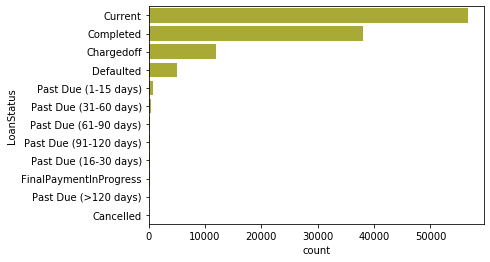

In [5]:
b_color = sb.color_palette()[8]
bar_order = ploan['LoanStatus'].value_counts().index
sb.countplot(data=ploan, y='LoanStatus',color=b_color, order=bar_order );


**Loan Status:**   
All the entries here are approved loan applications. Status show how far has the borrowers have come through. Most of the applications are current, which means borrowers are making timely repayment. The second most frequent status is completed. A significant amount of applications are charged off and defaulted -- it is interesting if we can find any trend of what kind of borrowers usually turn a debt into a bad one.   
I can combine all those past due into one status for analysis. 

In [6]:
ploan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

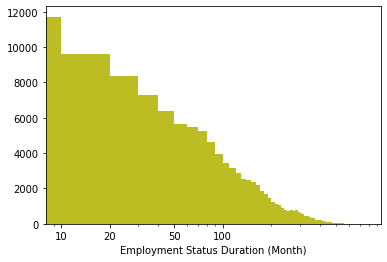

In [7]:
base_color = sb.color_palette()[8]

bin_edge = np.arange(0, ploan.EmploymentStatusDuration.max()+10, 10 )
plt.hist(data=ploan, x='EmploymentStatusDuration',color=base_color, bins=bin_edge)

plt.xscale('log')
ticks_loc = [10, 20, 50, 100]
plt.xticks(ticks_loc, ticks_loc)

plt.xlabel('Employment Status Duration (Month)');

**Employment Status**  
Most loan applicants are employed, in different forms. Most people are at the beginning in the employment status when they get the loans. The higher the employment status duration is, the less likely one takes a loan.   
But how are those employed and retired like in terms of the status duration tho? 

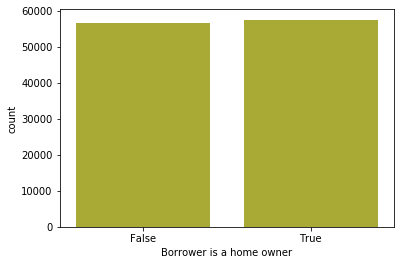

In [8]:
sb.countplot(data=ploan, x='IsBorrowerHomeowner', color=base_color)
plt.xlabel('Borrower is a home owner');

**Home ownership**  
Slightly more than half of the borrowers are home owner and the rest are not.   
Does it mean home ownership doesn't have much impact? Probably not but we will need to look at some specific groups of borrowers. 

In [9]:
ploan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

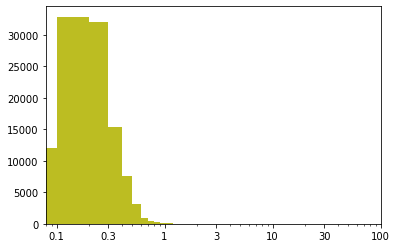

In [10]:
bin_edge = np.arange(0, ploan.DebtToIncomeRatio.max()+0.1, 0.1)

plt.hist(data=ploan, x='DebtToIncomeRatio', bins=bin_edge, color=base_color)
plt.xscale('log')
ticks_loc = [0.1, 0.3, 1, 3, 10, 30, 100]
plt.xticks(ticks_loc, ticks_loc);

**Debt To Income Ratio**  
The debt to income ratio mostly are between 0.1 to 0.3. Very few people actually get a debt to income ratio higher than 0.3.

In [11]:
ploan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

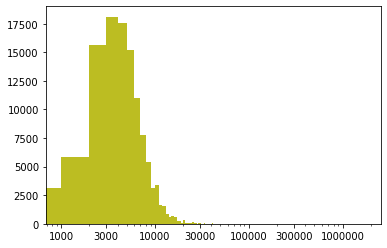

In [12]:
bin_edge = np.arange(0, ploan.StatedMonthlyIncome.max()+500,1000 ) 


plt.hist(data=ploan, x='StatedMonthlyIncome', bins=bin_edge, color=base_color)
plt.xscale('log')
ticks_loc = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.xticks(ticks_loc, ticks_loc);



**Stated Monthly Income**  
Unimodality is shown, with a peak at 4k - 6k. 

In [13]:
ploan.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

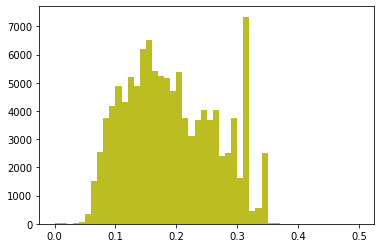

In [14]:
bin_edge = np.arange(0, ploan.BorrowerRate.max()+0.01, 0.01)

plt.hist(data=ploan, x='BorrowerRate', color=base_color, bins=bin_edge);


**Borrower Rate**  
The borrower rate is actually pretty high. It ranges from 0% to 49.75%. It looks like normal distribution but with a strange peak at around 30%. 

In [15]:
ploan.AvailableBankcardCredit.describe()  

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

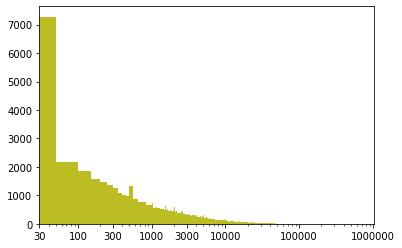

In [16]:
bin_edge = np.arange(0, ploan.AvailableBankcardCredit.max()+50, 50)

plt.hist(data=ploan, x='AvailableBankcardCredit', color=base_color, bins=bin_edge)

plt.xscale('log')
ticks_loc = [30, 100, 300, 1000, 3000, 10000, 100000, 1000000]
plt.xticks(ticks_loc, ticks_loc);


**Available Bank card Credit**  
Right skewed with a peak at 30 - 40 credit and a strange peak at 500-600.

In [17]:
ploan.AmountDelinquent.describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

/Users/wongszekizalon/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/wongszekizalon/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


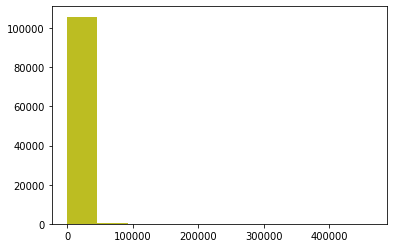

In [18]:
plt.hist(data=ploan, x='AmountDelinquent', color=base_color);

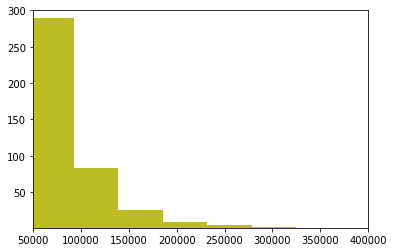

In [19]:
# a majority of applicants do not have delinquency, so I zoom in to those actually with an amount. 
plt.hist(data=ploan, x='AmountDelinquent', color=base_color)
plt.xlim(50000, 400000)
plt.ylim(1, 300);

In [20]:
ploan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

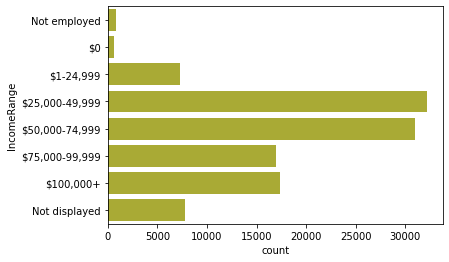

In [21]:
range_order = ['Not employed','$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
               'Not displayed' ]

sb.countplot(data=ploan, y='IncomeRange', color=b_color, order=range_order);

**Income Range**  
Most of the applicants fall within the income range of $25000 - $49000 and $50000 - $74999. It also show sligh left-skewed trend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I did logarithmic transformation on employment status duration, Stated Monthly Income, Available Bank card Credit. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The are some strange peak in the histograms of available bank card credit and borrower rate but I didn't explore it. 

## Bivariate Exploration

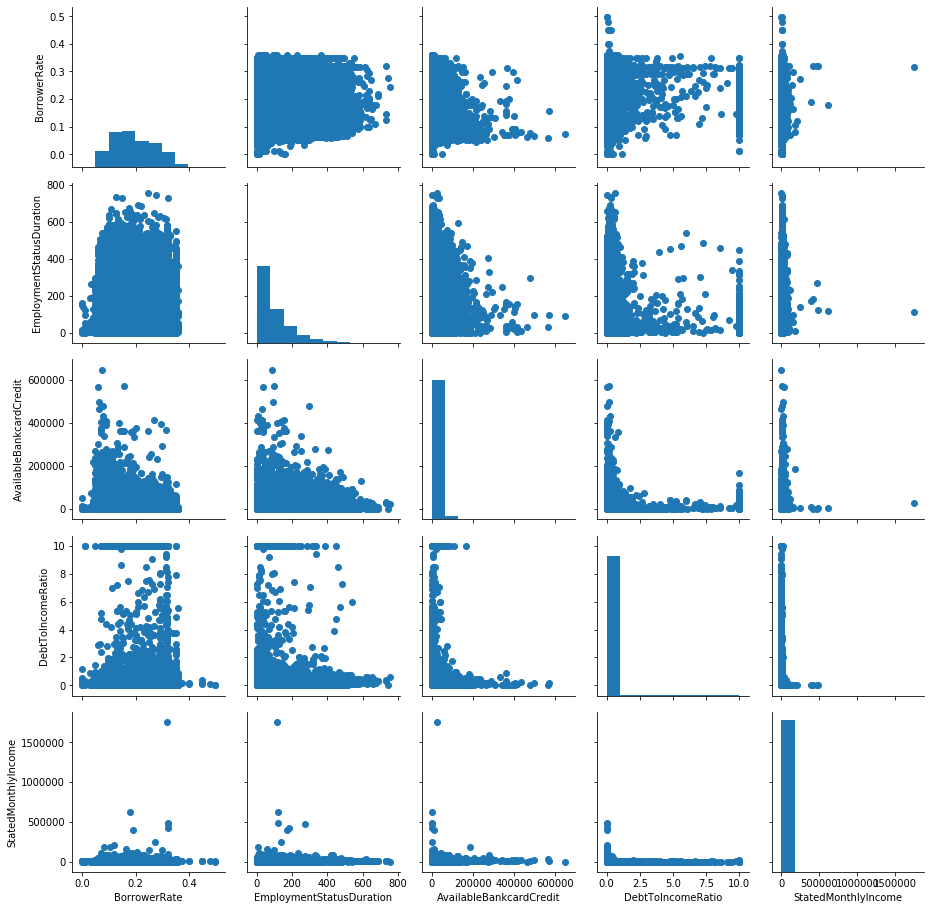

In [22]:
# plot matrices of numerical variables
num_var = ['BorrowerRate','EmploymentStatusDuration','AvailableBankcardCredit','DebtToIncomeRatio',
           'StatedMonthlyIncome']

g = sb.PairGrid(data=ploan, vars=num_var)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

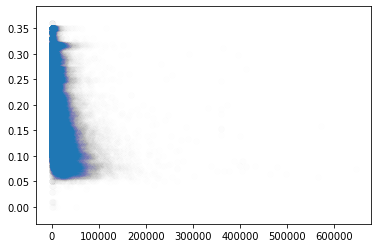

In [23]:
# borrower rate vs available bank card caredit (scatterplot)

plt.scatter(data=ploan, x='AvailableBankcardCredit', y='BorrowerRate', alpha=0.003);
#plt.xscale('log')
#x_ticks_loc = [100000, 200000, 500000, 1000000]
#plt.xticks(x_ticks_loc,x_ticks_loc)

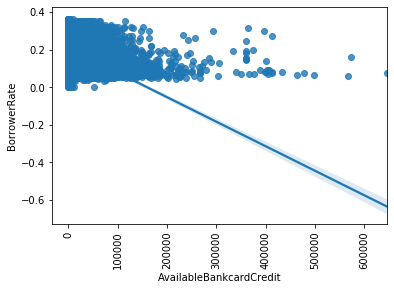

In [24]:
# borrower rate vs available bank card credit (scatterplot)

sb.regplot(data=ploan, x='AvailableBankcardCredit', y='BorrowerRate')
#plt.xscale('log')
#x_ticks_loc = [1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000]
#plt.xticks(x_ticks_loc,x_ticks_loc)
#plt.xlim(1, 200000)
plt.xticks(rotation=90);

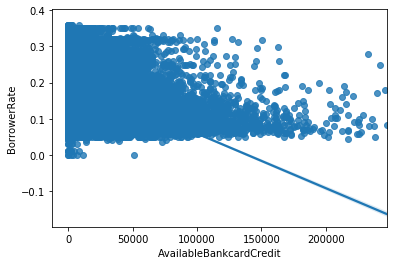

In [25]:
# remove outliers
no_out_ploan = ploan.query('AvailableBankcardCredit < 250000')
no_out_ploan

sb.regplot(data=no_out_ploan, x='AvailableBankcardCredit', y='BorrowerRate');

**(Above) Scatter plot for borrower rate (Y) vs available bank card credit (X)**  
It seems that there is no explicit reletionship between the two variables. Even if available bank card credit is higher (between 100K - 150K), the borrower remains at a similar level (0.05 - 0.10). But we reduce the transparency and use sb.regplot to find out the regression line, we actually somewhat see a negative trend.   
Idea -- how about explore how available bank card credit affect maximum borrower rate?


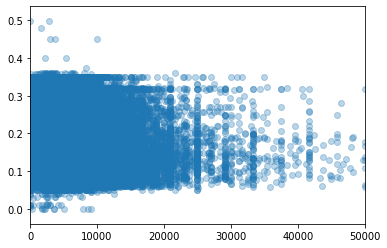

In [26]:
# borrower rate vs stated monthly income (scatterplot)

plt.scatter(data=ploan, x='StatedMonthlyIncome', y='BorrowerRate', alpha = 0.3)
plt.xlim(0,50000);

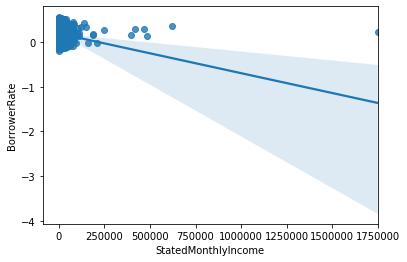

In [27]:
sb.regplot(data=ploan, x='StatedMonthlyIncome', y='BorrowerRate', x_jitter=0.2, y_jitter=0.2);
#plt.xlim(0,50000)
#plt.ylim(0,0.5)

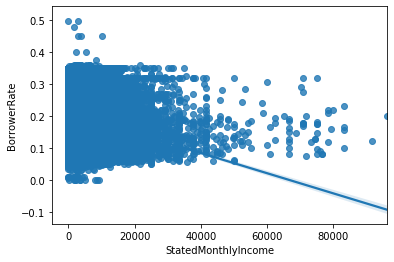

In [28]:
# remove outliers
no_out_ploan1 = ploan.query('StatedMonthlyIncome < 100000')
no_out_ploan1

sb.regplot(data=no_out_ploan1, x='StatedMonthlyIncome', y='BorrowerRate');

**(Above) Scatter plot for borrower rate (Y) vs stated monthly income (X)**  
It seems that there is also no explicit reletionship between the two variables. Even though the maximum borrower rate seems to reduce when stated monthly income increase, the trend is very subtle.   
Idea -- how about explore how stated monthly income affect maximum borrower rate?

In [29]:
ploan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

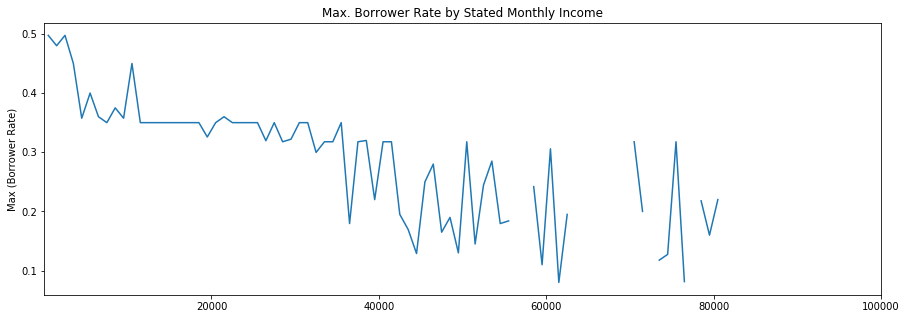

In [30]:
# StatedMonthlyIncome (X) vs. borrower rate (Y)
# set bin edges, compute center
bin_size = 1000
xbin_edges = np.arange(0, ploan.StatedMonthlyIncome.max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute max and min of borrower rate in each bin
data_xbins = pd.cut(ploan['StatedMonthlyIncome'], xbin_edges, right=False, include_lowest=True)
y_max = ploan['BorrowerRate'].groupby(data_xbins).max()

plt.figure(figsize=[15,5])
plt.errorbar(x=xbin_centers, y=y_max)
plt.xlim(1,100000)
plt.title('Max. Borrower Rate by Stated Monthly Income')
plt.ylabel('Max (Borrower Rate)') ;

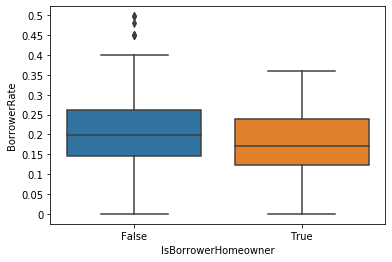

In [31]:
sb.boxplot(data=ploan, x='IsBorrowerHomeowner', y='BorrowerRate')
y_ticks_loc=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.yticks(y_ticks_loc,y_ticks_loc);

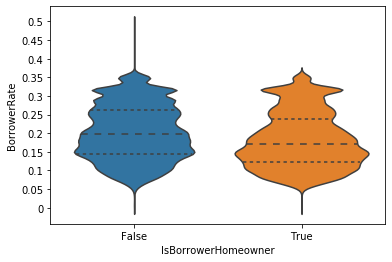

In [32]:
sb.violinplot(data=ploan, x='IsBorrowerHomeowner', y='BorrowerRate', inner='quartile')
y_ticks_loc=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.yticks(y_ticks_loc,y_ticks_loc);

**(Above) boxplot & violinplot for borrower rate (Y) vs home owenership (X)**  
The median borrower rates for home owners are lower than that of non-home owners, though the difference is not very significant as seen in the graph but it is actually practically significant to have a 5% lower rate. The shape of the violineplots for home owner and non-home owner are identical, showing that distribution of borrower rates for home owner and non-home owner are similar.  
Idea for presentation -- show percentage intead of decimal numbers. 

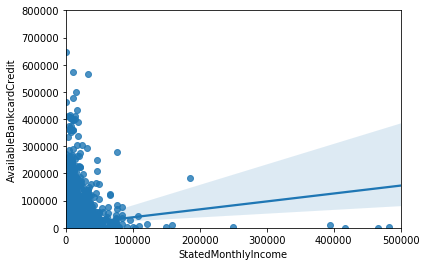

In [33]:
# AvailableBankcardCredit vs. StatedMonthlyIncome
sb.regplot(data=ploan, y='AvailableBankcardCredit', x='StatedMonthlyIncome')
plt.xlim(0, 500000)
plt.ylim(0, 800000);

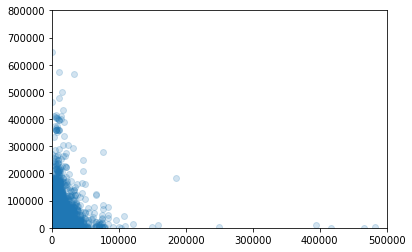

In [34]:
plt.scatter(data=ploan, y='AvailableBankcardCredit', x='StatedMonthlyIncome', alpha=0.2)
plt.xlim(0, 500000)
plt.ylim(0, 800000);

**Available Bank card Credit vs. Stated Monthly Income**  
NO explicit correlation

In [35]:
ploan.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [36]:
ploan.AvailableBankcardCredit.describe()

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

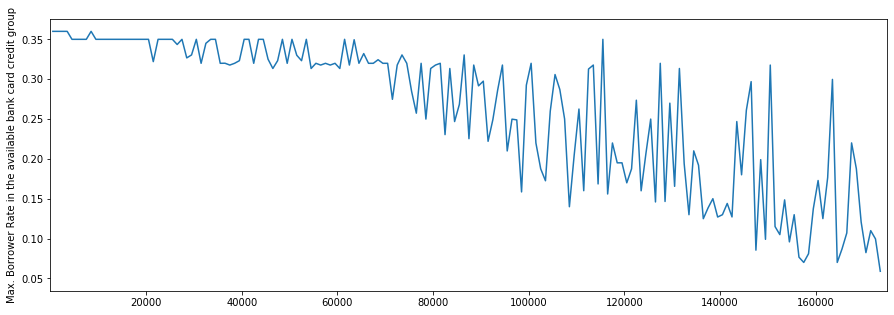

In [37]:
# available bank card credit (X) vs. borrower rate (Y)
# set bin edges, compute center
bin_size = 1000
xbin_edges = np.arange(0, ploan.AvailableBankcardCredit.max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute max and min of borrower rate in each bin
data_xbins = pd.cut(ploan['AvailableBankcardCredit'], xbin_edges, right=False, include_lowest=True)
y_max = ploan['BorrowerRate'].groupby(data_xbins).max()

plt.figure(figsize=[15,5])
plt.errorbar(x=xbin_centers, y=y_max)
plt.xlim(1,175000)
plt.ylabel('Max. Borrower Rate in the available bank card credit group');

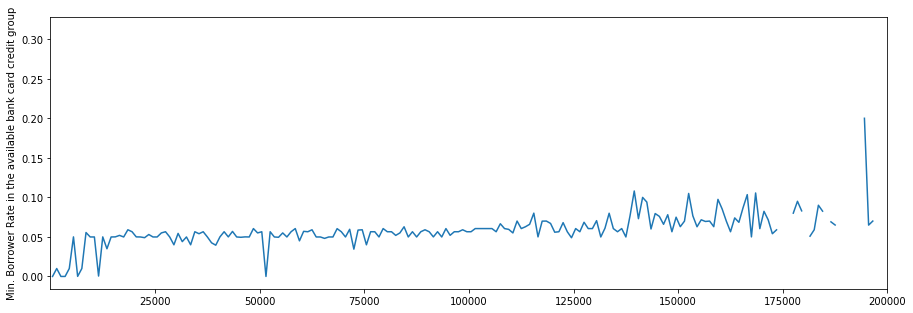

In [38]:
# available bank card credit (X) vs. borrower rate (Y)
# set bin edges, compute center
bin_size = 1000
xbin_edges = np.arange(0, ploan.AvailableBankcardCredit.max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute max and min of borrower rate in each bin
data_xbins = pd.cut(ploan['AvailableBankcardCredit'], xbin_edges, right=False, include_lowest=True)
y_min = ploan['BorrowerRate'].groupby(data_xbins).min()

plt.figure(figsize=[15,5])
plt.errorbar(x=xbin_centers, y=y_min)
plt.xlim(1,200000)
plt.ylabel('Min. Borrower Rate in the available bank card credit group');

**Maximum borrower Rate in the available bank card credit group**  
I set the available bank card credit into bins. For each bin, I look at the highest borrower rate only becuase I saw from previous plots that the lower borrower rates do not show obvious trend. From this exploration, it appears that when vailable bank card credit increases, the maximum borrower rate decreases but still fluctuates.   

No special trend is found in minimum borrower. 

In [39]:
ploan.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

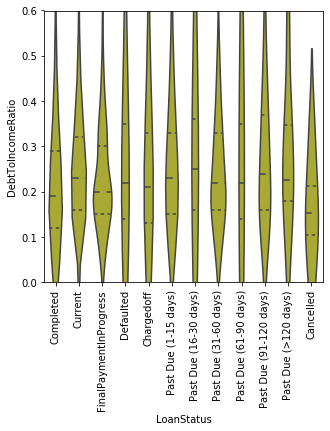

In [40]:
# DebtToIncomeRatio (Y) vs LoanStatus (X) - numeric & categorical
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

base_color = sb.color_palette()[8]
plt.figure(figsize=[5,5])
sb.violinplot(data=ploan, x='LoanStatus', y='DebtToIncomeRatio', order=disp_order, color=base_color,inner='quartile')
plt.xticks(rotation=90)
plt.ylim(0, 0.6);

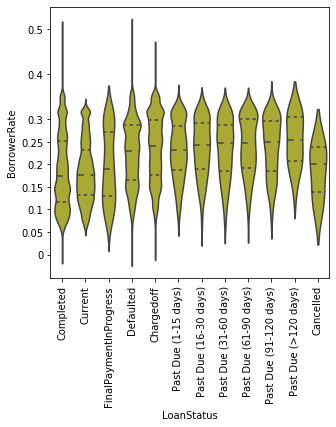

In [41]:
# BorrowerRate (Y) vs LoanStatus (X) - numeric & categorical
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

base_color = sb.color_palette()[8]
plt.figure(figsize=[5,5])
sb.violinplot(data=ploan, x='LoanStatus', y='BorrowerRate', order=disp_order, inner='quartile', color=base_color)
yticks_loc = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
plt.yticks(yticks_loc, yticks_loc)
plt.xticks(rotation=90);

**Borrower Rate (Y) vs Loan Status (X)**  
The borrower rate for those who completed, reached final payment and are currently repaying, the median borrower rate is below 0.2 (20%). More of these applicants' borrower rate concentrate on the lower end (below 20%). But the defaulted, charged off and past-due applicants, the median borrower rates are obviously higher (around 25%). Also, more of these applicants also concentrate on the higher end, above 25%.

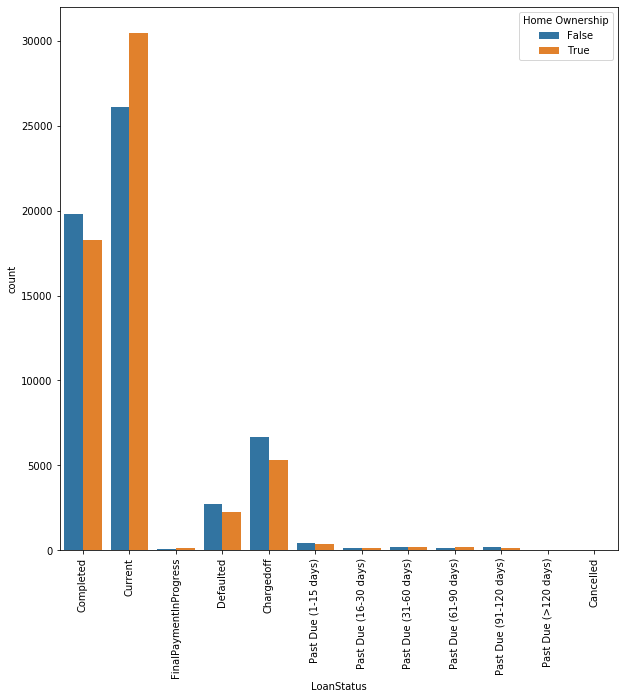

In [42]:
# IsBorrowerHomeowner (Y) vs LoanStatus (X) - categorical & categorical
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

plt.figure(figsize=[10,10])
ax = sb.countplot(data=ploan, x='LoanStatus', hue='IsBorrowerHomeowner', order=disp_order)
ax.legend(title='Home Ownership')
plt.xticks(rotation=90);


**Home ownership vs Loan Status (X)**  
Cant find obvious correlation. 

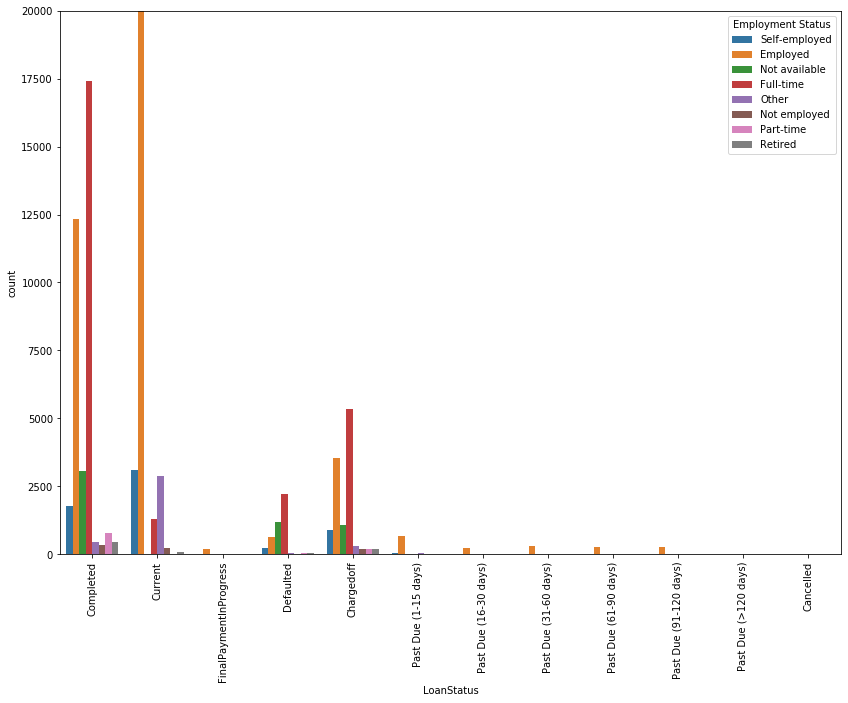

In [43]:
# EmploymentStatus (Y) vs LoanStatus (X) - categorical & categorical
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

plt.figure(figsize=[14,10])
ax = sb.countplot(data=ploan, x='LoanStatus', hue='EmploymentStatus', order=disp_order)
ax.legend(title='Employment Status', loc =1)
plt.xticks(rotation=90)
plt.ylim(0,20000);

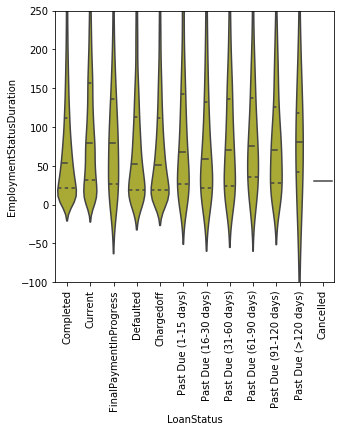

In [44]:
# EmploymentStatusDuration (Y) vs LoanStatus (X) - numeric & categorical
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

base_color = sb.color_palette()[8]
plt.figure(figsize=[5,5])
sb.violinplot(data=ploan, x='LoanStatus', y='EmploymentStatusDuration', order=disp_order, inner='quartile', 
              color=base_color)
#yticks_loc = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
#plt.yticks(yticks_loc, yticks_loc)
plt.xticks(rotation=90)
plt.ylim(-100, 250);

**Employment Status Duration vs Loan Status**
The median employment status duration of defaulted and chargedoff applicants are relatively lower but similar to that of completed case. 

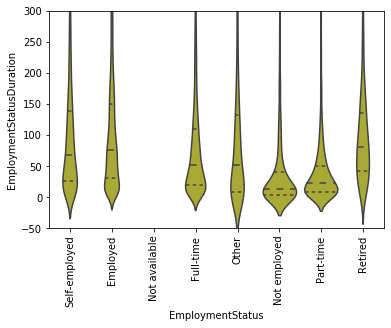

In [45]:
# EmploymentStatus vs. EmploymentStatusDuration - categorical vs. numerical

#plt.figure(figsize=[14,10])
sb.violinplot(data=ploan, x='EmploymentStatus', y='EmploymentStatusDuration', color=b_color, inner='quartile')
plt.xticks(rotation=90)
plt.ylim(-50,300);

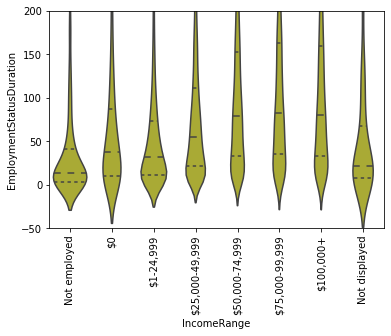

In [46]:
# IncomeRange vs. EmploymentStatusDuration - categorical vs. numerical
range_order = ['Not employed','$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
               'Not displayed' ]

sb.violinplot(data=ploan, y='EmploymentStatusDuration', x='IncomeRange',order=range_order, color=b_color, 
              inner='quartile')
plt.xticks(rotation=90)
plt.ylim(-50, 200);

**Income Range vs. Employment Status Duration (month)**  
Those in the higher income range ($25,000 onward) usually have a longer employment status duration (higher median) while those in the ranges below $25,000 have been in the relevant employment status for a shorter time. 

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is no obvious relationship between loan status and other factors explored (employment status, employment status duration, home ownership. Yet, I found that debt to income ratio seems to be correlated with loan status.  

As it seems that borrower rate seems to be in general not highly related to available bank card credit, it actually shows negative correlation after we bin the available bank card credit. The same can be seen between borrower rate and Stated Monthly Income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Not really. 

## Multivariate Exploration

### Issue one - What affect borrower rate?

/Users/wongszekizalon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


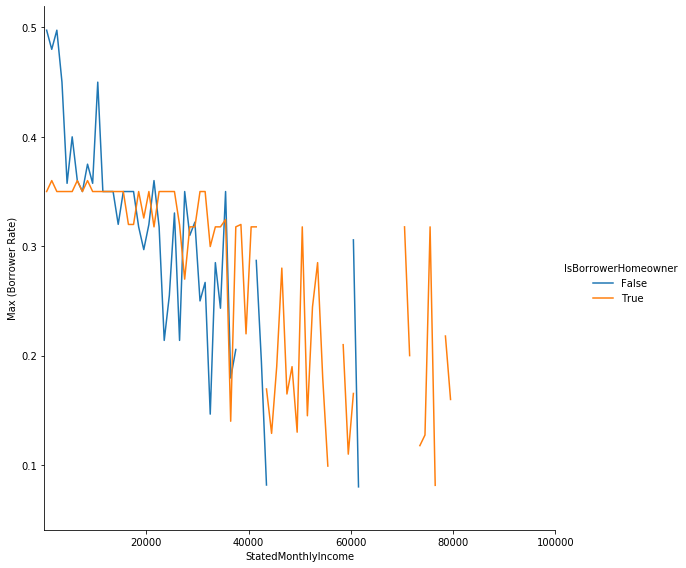

In [47]:
# max BorrowerRate (Y) vs StatedMonthlyIncome (X) by IsBorrowerHomeowner

def mean_poly(x, y, bins=1000, **kwargs):
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.lim(), x.max(), bins+1)
    bin_centers = (xbin_edges[1:] + xbin_edges[:-1]) / 2
    
    # compute counts
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    maxs = y.groupby(data_bins).max()
    
    # create plot
    plt.errorbar(x=bin_centers, y=maxs, **kwargs)

# set bin edges, compute center
bin_size = 1000
xbin_edges = np.arange(0, ploan.StatedMonthlyIncome.max()+bin_size, bin_size)

g = sb.FacetGrid(data=ploan, hue='IsBorrowerHomeowner', size=8)
g.map(mean_poly, 'StatedMonthlyIncome', 'BorrowerRate', bins=xbin_edges)

plt.xlim(1,100000)
plt.ylabel('Max (Borrower Rate)')
g.add_legend()


**BorrowerRate (Y) vs StatedMonthlyIncome (X) by IsBorrowerHomeowner (hue)**  
THe negative correlation between maximum borrower rate and stated monthly income is displayed for both home owners and non-home owners. It means that the higher the stated monthly income, the lower the maximum borrower rate is offered. When we introduce the factor of home ownership, it doesnt seem to show an explicit relationship. However, if we pay more attention, there are two features we can conclude: 1. the maximum borrower rate for home owner with very low stated monthly income is significantly lower and remains at a range for a while before the rate starts to drop. 2. The maximum borrower rate starts to drop earlier across stated monthly income increase and dives deeper for non-home owners. It means that home ownership poses negative impact on home owners when borrowing in Prosper as they are less likely to be offered a lower borrower rate. 

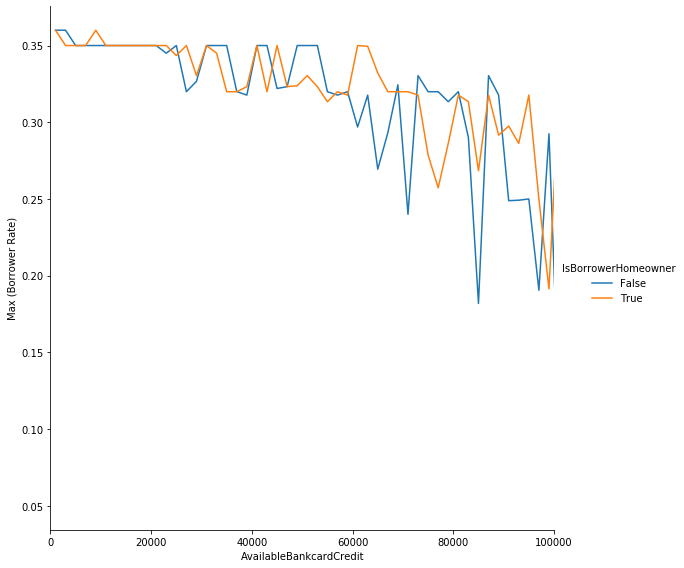

In [48]:
# max BorrowerRate (Y) vs AvailableBankcardCredit (X) by IsBorrowerHomeowner

def mean_poly(x, y, bins=10, **kwargs):
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.lim(), x.max(), bins+1)
    bin_centers = (xbin_edges[1:] + xbin_edges[:-1]) / 2
    
    # compute counts
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    maxs = y.groupby(data_bins).max()
    
    # create plot
    plt.errorbar(x=bin_centers, y=maxs, **kwargs)

# set bin edges, compute center
bin_size = 2000
xbin_edges = np.arange(0, ploan.StatedMonthlyIncome.max()+bin_size, bin_size)

g = sb.FacetGrid(data=ploan, hue='IsBorrowerHomeowner', size=8)
g.map(mean_poly, 'AvailableBankcardCredit', 'BorrowerRate', bins=xbin_edges)

plt.xlim(0,100000)
plt.ylabel('Max (Borrower Rate)')
g.add_legend();


**BorrowerRate (Y) vs AvailableBankcardCredit (X) by IsBorrowerHomeowner (hue)**  
The negative correlation between maximum borrower rate and available bank car credit is displayed for both home owners and non-home owners. It means that the higher the available bank car credit. the lower maximum borrower rate is offered. When we introduce the factor of home ownership, it doesnt seem to show an explicit relationship. However, if we pay more attention, it seems that a similar negative effect is brought by home ownership too. 

### Issue two - What affect loan status?

In [49]:
problematic = ['Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
               'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

prob_ploan = ploan[(ploan.LoanStatus.isin(problematic))]
prob_ploan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
12,0F1A3597143888805163EF7,1081604,2013-12-15 20:01:10.757000000,NaN,36,Past Due (1-15 days),NaN,0.17969,0.1435,0.1335,...,-3.40,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,-9.81,0.00,3790.25,3790.25,0.00,1.0,0,0,0.0,10
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.00,6012.65,6012.67,268.96,1.0,0,0,0.0,85
23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073000000,NaN,36,Defaulted,2013-12-26 00:00:00,0.28032,0.2419,0.2319,...,-4.89,0.00,1882.27,1882.27,0.00,1.0,0,0,0.0,30
42,10AD33803102786533722BB,93263,2007-02-04 17:24:27.850000000,HR,36,Chargedoff,2008-08-08 00:00:00,0.30300,0.2900,0.2850,...,-7.14,0.00,1096.92,1096.92,0.00,1.0,0,0,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113904,C97434024964924789B94BC,218555,2007-10-20 03:02:28.447000000,C,36,Chargedoff,2009-07-01 00:00:00,0.24753,0.2400,0.2300,...,-106.99,-28.51,6682.76,6682.76,105.60,1.0,0,0,0.0,79
113905,C97E35311333117565C8E84,539189,2011-11-15 15:32:05.890000000,NaN,36,Chargedoff,2013-02-04 00:00:00,0.35797,0.3177,0.3077,...,-27.96,0.00,3325.15,3325.15,0.00,1.0,0,0,0.0,69
113914,D20533652658825353F6597,30223,2006-08-09 14:34:40.010000000,HR,36,Defaulted,2007-03-19 00:00:00,0.25757,0.2500,0.2450,...,-2.43,0.00,2883.01,2883.00,0.00,1.0,0,0,0.0,1
113918,D207342464194217591D1E1,353488,2008-06-19 12:02:53.300000000,A,36,Defaulted,2011-01-27 00:00:00,0.12201,0.1080,0.0980,...,-103.49,0.00,2176.53,2176.51,0.00,1.0,0,0,0.0,173


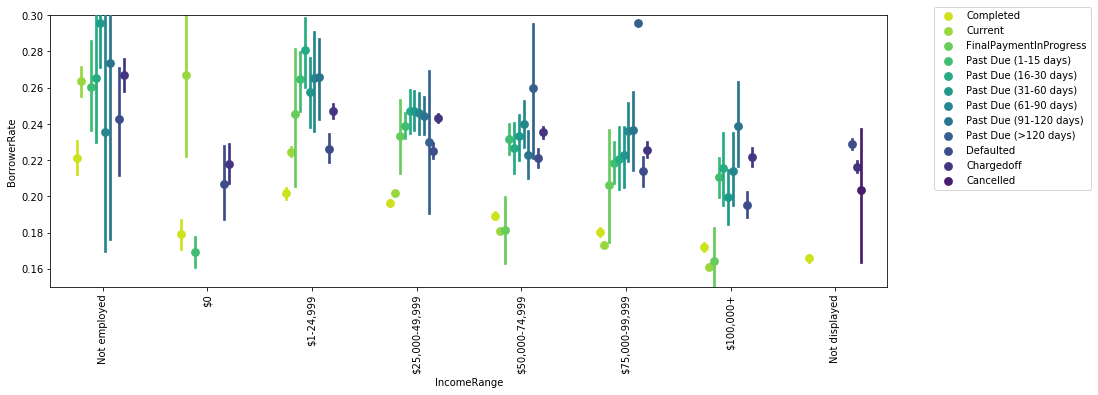

In [50]:
# BorrowerRate (Y) vs IncomeRange (X) by LoanStatus
# A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot 
# points and provides some indication of the uncertainty around that estimate using error bars.

disp_order = ['Completed', 'Current', 'FinalPaymentInProgress',  'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Defaulted', 'Chargedoff','Cancelled']

range_order = ['Not employed','$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
               'Not displayed' ]

plt.figure(figsize=[15,5])
ax = sb.pointplot(data=ploan, hue='LoanStatus', y='BorrowerRate', x='IncomeRange', dodge=0.5, linestyles='', 
                  hue_order=disp_order, order=range_order, palette='viridis_r')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.05, 1.05))
plt.ylim(0.15, 0.30);

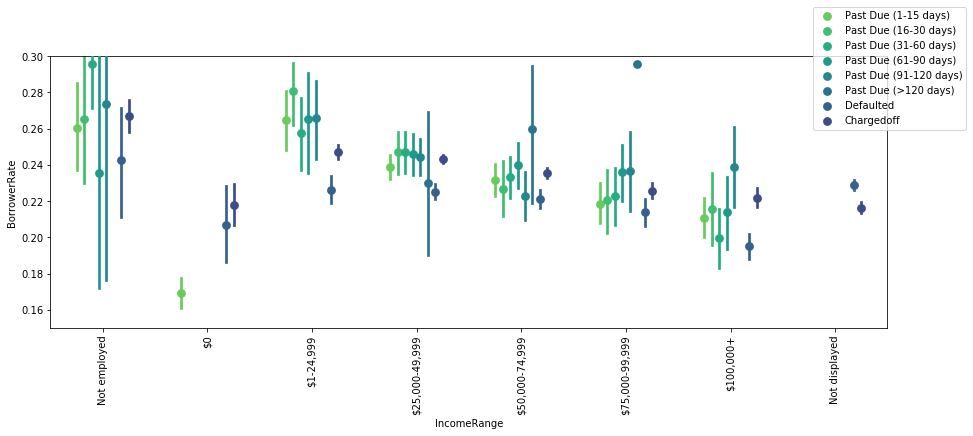

In [51]:
# BorrowerRate (Y) vs IncomeRange (X) by LoanStatus
# focus only on those problematic cases
disp_order = ['Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Defaulted', 'Chargedoff', ]

range_order = ['Not employed','$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
               'Not displayed' ]

color= sb.color_palette('viridis_r',12)[2:]
plt.figure(figsize=[15,5])
ax = sb.pointplot(data=prob_ploan, hue='LoanStatus', y='BorrowerRate', x='IncomeRange', dodge=0.5, linestyles='', 
                  hue_order=disp_order, order=range_order, palette=color)
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.2))
plt.ylim(0.15, 0.30);

**BorrowerRate (Y) vs IncomeRange (X) by LoanStatus**  
Across all loan status, borrower rate cheifly decrease with income range. When we focus only on those past due, the the borrower rates (median) are usually higher than that for those defaulted and charged-off cases among all income ranges, except for $0 and 'Not displayed'.

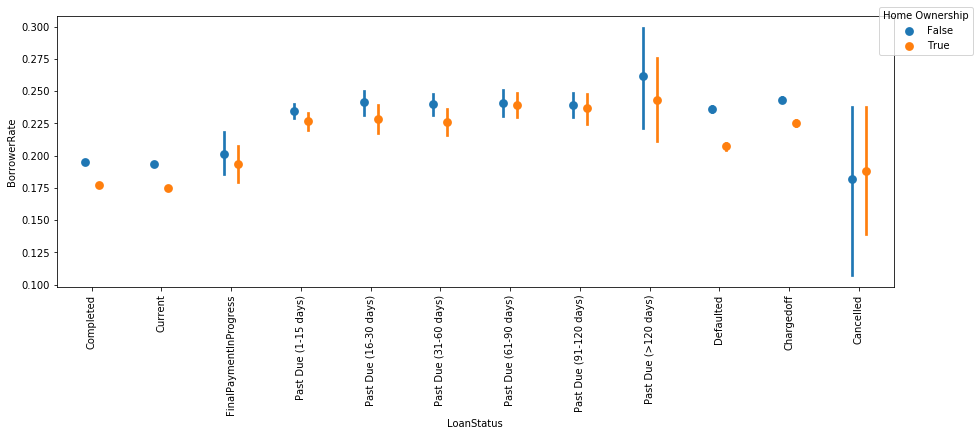

In [52]:
# BorrowerRate (Y) vs LoanStatus (X) by IsBorrowerHomeowner
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Defaulted', 'Chargedoff', 'Cancelled']

range_order = ['Not employed','$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',
               'Not displayed' ]

plt.figure(figsize=[15,5])
ax = sb.pointplot(data=ploan, x='LoanStatus', y='BorrowerRate', hue='IsBorrowerHomeowner', dodge=0.2, linestyles='', 
                  order=disp_order)
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.1, 1.05), title='Home Ownership');

**BorrowerRate (Y) vs LoanStatus (X) by IsBorrowerHomeowner**  
Across all loan status, except cancelled applications, home owners have a higher borrower rate than non-home owners. Those with a longer past-due period tend to have a higher borrower rate. As in the defaulted and charged-off cases, the gap between median borrower rates for home owners and non-home owners are largest. All cases with unsuccessful repayment, regardless of home ownership, the borrower rates are higher than those cases without late payment. 

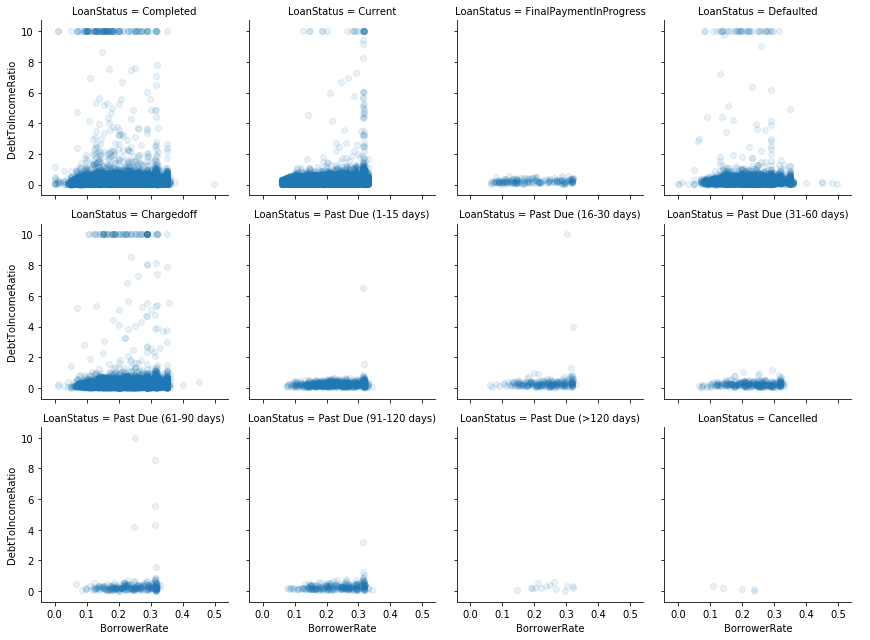

In [53]:
# BorrowerRate (Y) vs DebtToIncomeRatio (X) by LoanStatus 
disp_order = ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)','Cancelled']

g = sb.FacetGrid(data=ploan, col='LoanStatus', col_wrap=4, col_order=disp_order)
g.map(plt.scatter, 'BorrowerRate', 'DebtToIncomeRatio',alpha=0.1)
g.add_legend();

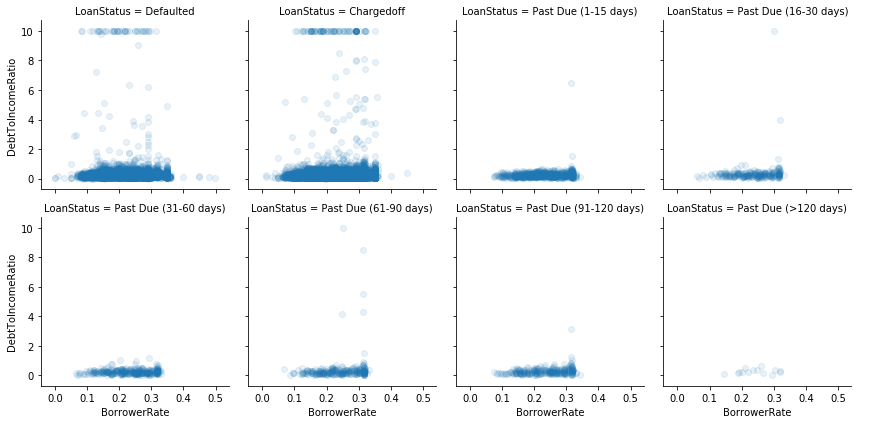

In [54]:
# focus only on those problematic cases
disp_order = ['Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
              'Past Due (>120 days)']

g = sb.FacetGrid(data=prob_ploan, col='LoanStatus', col_wrap=4, col_order=disp_order)
g.map(plt.scatter, 'BorrowerRate', 'DebtToIncomeRatio',alpha=0.1)
g.add_legend();

**BorrowerRate (Y) vs DebtToIncomeRatio (X) by LoanStatus**  
Relationship are not very obvious. Thoe defaulted and charged-off loans display higher debt to income ratio across borrower rate. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Incorporating the impact of income range, the median borrower rates of the defaulted, charged off and past-due applicants are still higher.

### Were there any interesting or surprising interactions between features?

In general, home owners have a lower borrower rate when getting a loan as shown in bivariate exploration. Suprisingly, if I focus on the top borrower rates, I found that non-home owners actually get a lower maximum borrower rate in a sense that applicants with higher available bank card credit and stated monthly income usually get a lower borrower rate but for home owners and non-home owners with similar available bank card credit and stated monthly income, the former receive a higher borrower rate. 